<a href="https://colab.research.google.com/github/angiegh2002/language_app/blob/main/language_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 22.3 MB/s eta 0:00:00


In [6]:
# !curl -X GET  "https://huggingface.co/api/datasets/riotu-lab/arabic_reverse_dictionary/parquet/default/train"

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_parquet("/content/drive/MyDrive/Dataset data/data.parquet")


In [8]:
dataset.head()

,word,definition
0,تمنيع ذاتي,تحريض لاستجابة مناعية لبعض مكونات العضوية [الك...
1,مَسارٌ هاملتوني,مسار يمر عبر كل رأس في رسم بياني دون تكرار أي ...
2,الكلمة,أصغر وحدة لغوية تحمل معنى مستقل ويمكن استخدامه...
3,طرف,الجانبي جمع (طرفَة) وهو الغريبة من التمر [لغة]
4,الاسم,كلمة تدل على شيء أو شخص أو مكان وتستخدم عادة ف...


In [9]:
dataset.shape

(58607, 2)

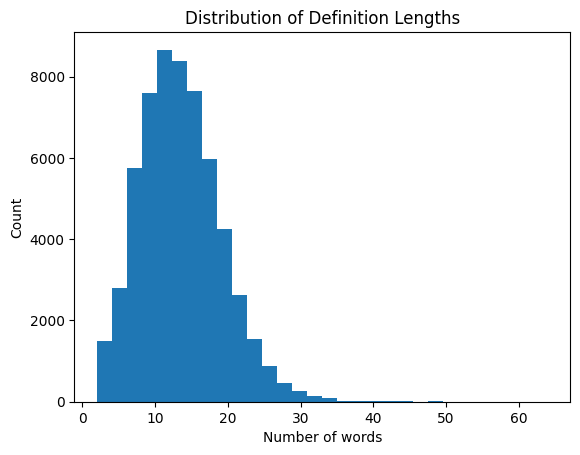

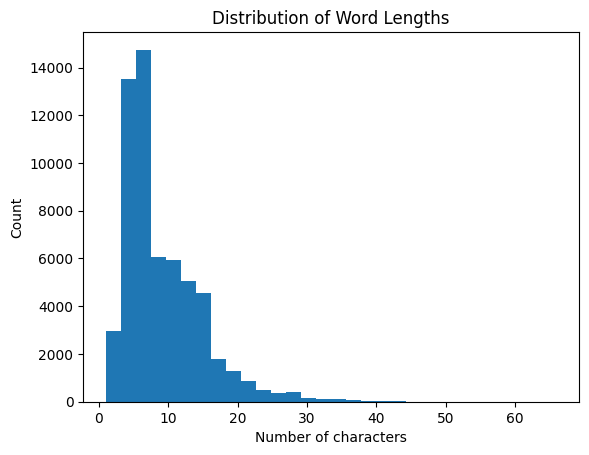

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
def_lengths = [len(str(row['definition']).split()) for index, row in dataset.iterrows() if row['definition'] is not None]
word_lengths = [len(str(row['word'])) for index, row in dataset.iterrows() if row['word'] is not None]

plt.hist(def_lengths, bins=30)
plt.title("Distribution of Definition Lengths")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.show()

plt.hist(word_lengths, bins=30)
plt.title("Distribution of Word Lengths")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.show()

In [11]:
definitions = [row['definition'] for index, row in dataset.iterrows()]
words = [row['word'] for index, row in dataset.iterrows()]

print(f"Missing definitions: {sum([d is None for d in definitions])}")
print(f"Missing words: {sum([w is None for w in words])}")

print(f"Unique words: {len(set(words))}")

Missing definitions: 0
Missing words: 2
Unique words: 35617


In [12]:
dataset_clean = dataset.dropna(subset=['word'])
print(f"بعد التنظيف: {len(dataset_clean)} صف")


بعد التنظيف: 58605 صف


In [13]:
dataset_clean.duplicated().sum()

np.int64(61)

In [14]:
dataset_clean = dataset_clean.drop_duplicates()
print(f"بعد التنظيف: {len(dataset_clean)} صف")

بعد التنظيف: 58544 صف


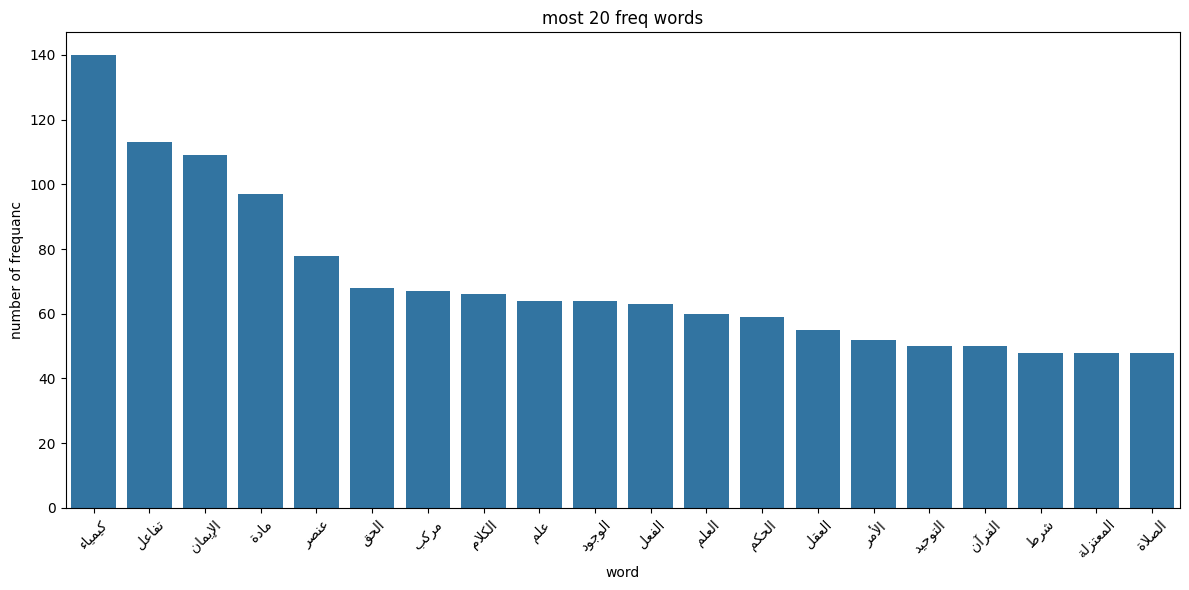

In [15]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

word_counter = Counter(dataset_clean["word"])
common_words = word_counter.most_common(20)

reshaped_words = [arabic_reshaper.reshape(word) for word, _ in common_words]
bidi_words = [get_display(w) for w in reshaped_words]
counts = [count for _, count in common_words]

plt.figure(figsize=(12, 6))
sns.barplot(x=bidi_words, y=counts)
plt.xticks(rotation=45)
plt.title("most 20 freq words")
plt.xlabel("word")
plt.ylabel("number of frequanc")
plt.tight_layout()
plt.show()


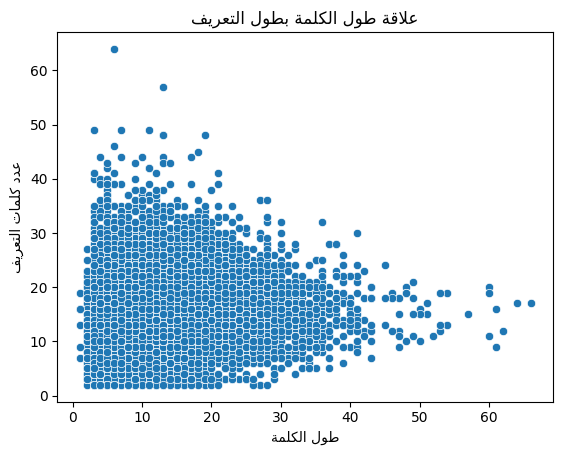

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

dataset_clean["word_length"] = dataset_clean["word"].apply(len)
dataset_clean["def_length"] = dataset_clean["definition"].apply(lambda x: len(str(x).split()))

sns.scatterplot(data=dataset_clean, x="word_length", y="def_length")

title_reshaped = arabic_reshaper.reshape("علاقة طول الكلمة بطول التعريف")
title_bidi = get_display(title_reshaped)
plt.title(title_bidi)

xlabel_reshaped = arabic_reshaper.reshape("طول الكلمة")
xlabel_bidi = get_display(xlabel_reshaped)
plt.xlabel(xlabel_bidi)

ylabel_reshaped = arabic_reshaper.reshape("عدد كلمات التعريف")
ylabel_bidi = get_display(ylabel_reshaped)
plt.ylabel(ylabel_bidi)

plt.show()

In [17]:
rare_words = word_counter.most_common()[-20:]
print("كلمات نادرة في البيانات:", [w for w, _ in rare_words])


كلمات نادرة في البيانات: ['طيف إصدار', 'بيان موجه ضعيف الترابط', 'ذراع', 'مصفوفة مهيمنة قطرية', 'قاعدة عضوية', 'قاعدة الميزان', 'منظار الحنجرة', 'عدد ماخ', 'الحشاشون', 'تکلید مشع', 'جزيئات', 'مُؤَشِّرُ الأسعار', 'يُعجب', 'تقسيم منتشر', 'الـشراء', 'الأخيف', 'السَّعْي إِذا كَانَ', 'الحاجات', 'مُبَرّد بيني', 'مُبَرْهَنةُ التَّمْدِيدِ لِتِيتُس']


In [18]:
dataset_clean["starts_with"] = dataset_clean["definition"].apply(lambda x: str(x).strip().split(" ")[0])
starts_freq = Counter(dataset_clean["starts_with"])
print("أكثر الكلمات بداية للتعريف:", starts_freq.most_common(10))


أكثر الكلمات بداية للتعريف: [('هو', 2703), ('مصطلح', 2159), ('عملية', 1995), ('هي', 1781), ('ما', 1207), ('مجموعة', 1135), ('اسم', 875), ('نوع', 845), ('حالة', 741), ('في', 712)]


In [19]:
unique_defs = set(dataset_clean["definition"])
print(f"نسبة التعاريف الفريدة: {len(unique_defs) / len(dataset_clean):.2%}")


نسبة التعاريف الفريدة: 99.91%


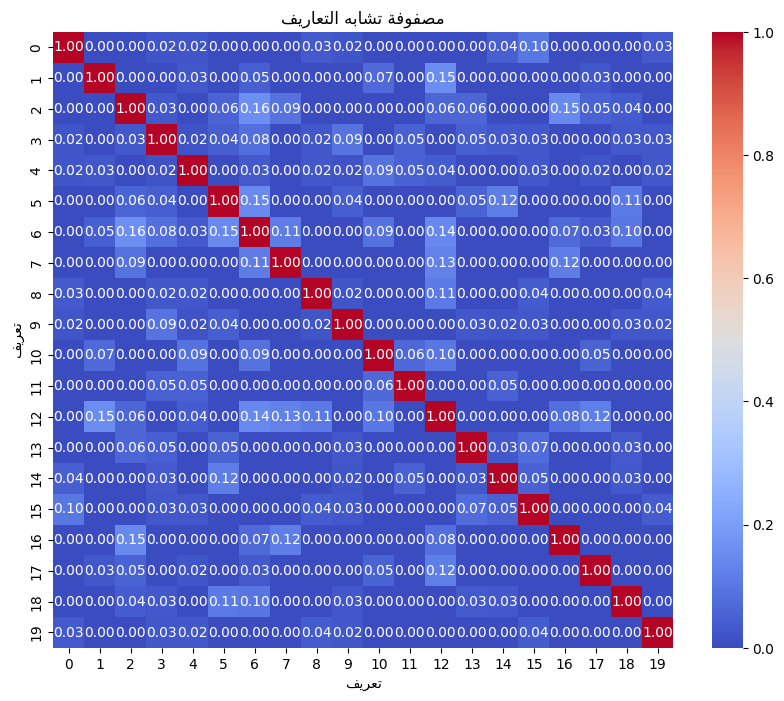

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

sample_defs = dataset_clean["definition"].dropna().sample(20, random_state=42).astype(str)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sample_defs)

similarity_matrix = cosine_similarity(X)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="coolwarm", annot=True, fmt=".2f")

title_ar = "مصفوفة تشابه التعاريف"
reshaped_title = arabic_reshaper.reshape(title_ar)
bidi_title = get_display(reshaped_title)
plt.title(bidi_title)

label_reshaped = arabic_reshaper.reshape("تعريف")
label_bidi = get_display(label_reshaped)

plt.xlabel(label_bidi)
plt.ylabel(label_bidi)
plt.show()


In [21]:
import re

def remove_diacritics(text):
    arabic_diacritics = re.compile("""
         ّ    | # Shadda
         َ    | # Fatha
         ً    | # Tanwin Fath
         ُ    | # Damma
         ٌ    | # Tanwin Damm
         ِ    | # Kasra
         ٍ    | # Tanwin Kasr
         ْ    | # Sukun
         ـ     # Tatwil/Kashida
     """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)

def clean_definition(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""
    text = re.sub(r'\s*\[[^\]]*\]\s*', ' ', text)
    text = re.sub(r'\b[a-zA-Z]+\b', ' ', text)
    text = re.sub(r'\b\d+[a-zA-Z]*\d*\b', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\s+،\s*', '، ', text)
    text = re.sub(r'\s+\.+\s*', '. ', text)
    text = re.sub(r'^[\s\.,،]+|[\s\.,،]+$', '', text)

    text = remove_diacritics(text)

    return text.strip()


In [22]:
def preprocess(row):
    cleaned_definition = clean_definition(row['definition'])
    word_no_diacritics = remove_diacritics(row['word'])
    word_no_diacritics = remove_diacritics(row['word'])
    return pd.Series({
        "input_text": f" صف الكلمة التالية : {word_no_diacritics}",
        "target_text": cleaned_definition
    })

processed_df = dataset_clean.apply(preprocess, axis=1)

In [23]:
processed_df

,input_text,target_text
0,صف الكلمة التالية : تمنيع ذاتي,تحريض لاستجابة مناعية لبعض مكونات العضوية
1,صف الكلمة التالية : مسار هاملتوني,مسار يمر عبر كل رأس في رسم بياني دون تكرار أي رأس
2,صف الكلمة التالية : الكلمة,أصغر وحدة لغوية تحمل معنى مستقل ويمكن استخدامه...
3,صف الكلمة التالية : طرف,الجانبي جمع (طرفة) وهو الغريبة من التمر
4,صف الكلمة التالية : الاسم,كلمة تدل على شيء أو شخص أو مكان وتستخدم عادة ف...
...,...,...
58602,صف الكلمة التالية : الاستفهام,طلب معرفة شيء أو تأكيده
58603,صف الكلمة التالية : السعي إذا كان,التعبير عن المضي الجري والسعي نحو شيء ما
58604,صف الكلمة التالية : الحاجات,المتطلبات الأساسية أو الضرورية للإنسان
58605,صف الكلمة التالية : مبرد بيني,مبادل حراري لتبريد الهواء بين مراحل الضغط المت...


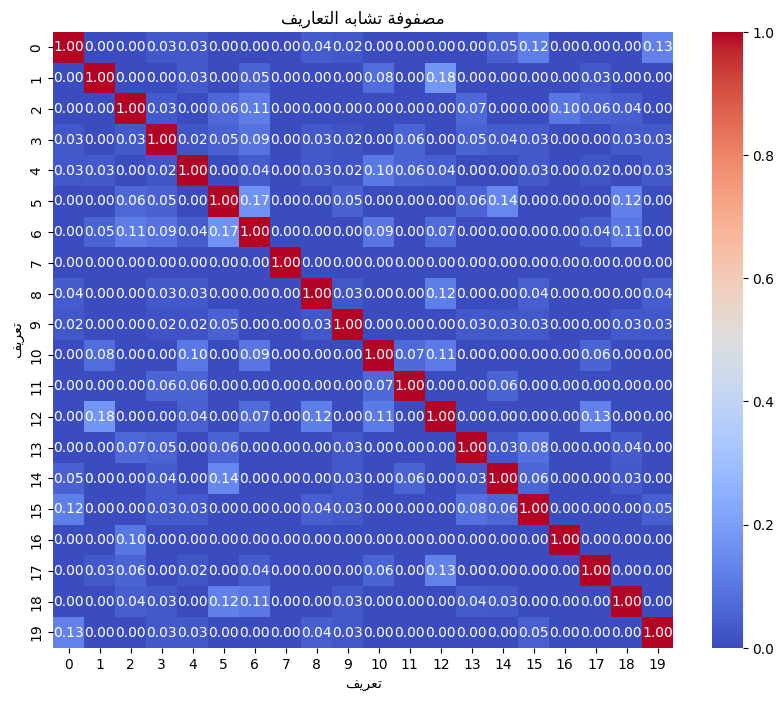

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

sample_defs = processed_df["target_text"].dropna().sample(20, random_state=42).astype(str)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sample_defs)

similarity_matrix = cosine_similarity(X)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="coolwarm", annot=True, fmt=".2f")

title_ar = "مصفوفة تشابه التعاريف"
reshaped_title = arabic_reshaper.reshape(title_ar)
bidi_title = get_display(reshaped_title)
plt.title(bidi_title)

label_reshaped = arabic_reshaper.reshape("تعريف")
label_bidi = get_display(label_reshaped)

plt.xlabel(label_bidi)
plt.ylabel(label_bidi)
plt.show()


In [25]:
unique_defs = set(processed_df["target_text"])
print(f" نسبة التعاريف الفريدة بعد التنظيف: {len(unique_defs) / len(dataset_clean):.2%}")


 نسبة التعاريف الفريدة بعد التنظيف: 99.72%


In [26]:
# from transformers import T5Tokenizer, T5ForConditionalGeneration

# model_name = "UBC-NLP/AraT5-base"
# tokenizer = T5Tokenizer.from_pretrained(model_name)
# model = T5ForConditionalGeneration.from_pretrained(model_name)

In [27]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

model_name = "flax-community/arabic-t5-small"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/683 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [28]:
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = Dataset.from_pandas(processed_df)
dataset_split = dataset.train_test_split(test_size=0.2, seed=42)
temp_split = dataset_split['test'].train_test_split(test_size=0.5, seed=42)

train_dataset = dataset_split['train']
val_dataset = temp_split['train']
test_dataset = temp_split['test']


In [29]:
def preprocess_function(examples):
    inputs = [inp for inp in examples["input_text"]]
    targets = [tgt for tgt in examples["target_text"]]

    model_inputs = tokenizer(
        inputs,
        max_length=128,
        truncation=True,
        padding="max_length",
        return_tensors=None
    )

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            targets,
            max_length=128,
            truncation=True,
            padding="max_length",
            return_tensors=None
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_val   = val_dataset.map(preprocess_function, batched=True)
tokenized_test  = test_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/46835 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3950: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/5854 [00:00<?, ? examples/s]

Map:   0%|          | 0/5855 [00:00<?, ? examples/s]

In [32]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from evaluate import load
import numpy as np

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    bleu_score = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                              references=[[ref.split()] for ref in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }

training_args = TrainingArguments(
    output_dir="./arabict5-description-model",
    do_train=True,
    do_eval=True,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    eval_steps=500,
    save_total_limit=2,
    fp16=True,
    report_to="none",
    run_name="arabict5-run"
)

optimizer = Adafactor(
    model.parameters(),
    scale_parameter=True,
    relative_step=False,
    warmup_init=False,
    lr=3e-5
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    optimizers=(optimizer, None),
    compute_metrics=compute_metrics
)

/tmp/ipython-input-4024811255.py:58: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [33]:
trainer.train()
trainer.save_model("/content/drive/MyDrive/arabict5-final")

Step,Training Loss
100,14.965300
200,1.687700
300,0.801700
400,0.730300
500,0.704100


In [58]:
import torch
torch.cuda.empty_cache()

final_metrics = trainer.evaluate()
print("نتائج التقييم النهائية على مجموعة الاختبار:")
print(final_metrics)
for k, v in final_metrics.items():
    if "rouge" in k:
        print(f"{k}: {v:.2f}")


OutOfMemoryError: CUDA out of memory. Tried to allocate 502.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 280.12 MiB is free. Process 5825 has 14.46 GiB memory in use. Of the allocated memory 14.18 GiB is allocated by PyTorch, and 157.13 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [49]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()

for i in range(10):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cuda")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cuda")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=50,
            num_beams=4,
            no_repeat_ngram_size=3,
            early_stopping=True
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(f" الإدخال: {input_text}")
    print(f" الناتج: {output_text}")
    print("="*50)


 الإدخال: صف الكلمة التالية : التقرب
 الناتج: : التقرب إلى الله ، ويعبر عن رغبة ورغبة في التقرب من الله إلى الله تعالى
 الإدخال: صف الكلمة التالية : سكريد
 الناتج: 
 الإدخال: صف الكلمة التالية : البرزخ
 الناتج: : البرزخ ، البرزخ، والبرزخ، أو البرزخ.
 الإدخال: صف الكلمة التالية : المسكنة
 الناتج: 
 الإدخال: صف الكلمة التالية : مثلث قطبي ذاتيا
 الناتج: أو كليهما متوازيان متلاصقان أو مساويا ويعبر عن مغامرتيهوي ذاتيا ، ويتكون من مجموعة من المثلثات و المثلثات التي
 الإدخال: صف الكلمة التالية : معامل الامتصاص الخطي
 الناتج: : معامل الامتصاص الخطي وعوامل الامتصاص ، معامل الإمتصاص الخطي، معامل الموجات الامتصاصية، معامل امتصاص الخطي. وعلاوة على ذلك، يتم قياس معامل التشبع في الامتصاص، معامل
 الإدخال: صف الكلمة التالية : ناقل حركة مسنني
 الناتج: ناقل حركة مسنني
 الإدخال: صف الكلمة التالية : توليوم
 الناتج: : توليوموموموم :
 الإدخال: صف الكلمة التالية : مجرور
 الناتج: مجرور مجرور أو مجرور، مجرور من مجرور إلى الياء
 الإدخال: صف الكلمة التالية : نحوعلمي
 الناتج: 


In [55]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

input_text = "صف الكلمة التالية : الاستدلال "
inputs = tokenizer(input_text, return_tensors="pt", padding=True)

outputs = model.generate(
    inputs["input_ids"],
    max_length=50,
    num_beams=4,
    early_stopping=True
)

generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("الوصف:", generated_text)


الوصف: : الاستدلال و الاستدلال الاستدلال و الاستدلال : الاستدلال و الاستدلال الاستدلال : الاستدلال : الاستدلال و الاستدلال


In [59]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from evaluate import load
import numpy as np

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    bleu_score = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                              references=[[ref.split()] for ref in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }

training_args = TrainingArguments(
    output_dir="./arabict5-description-model",
    do_train=True,
    do_eval=True,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=16,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    eval_steps=500,
    save_total_limit=2,
    fp16=True,
    report_to="none",
    run_name="arabict5-run"
)

optimizer = Adafactor(
    model.parameters(),
    scale_parameter=True,
    relative_step=False,
    warmup_init=False,
    lr=3e-5
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    optimizers=(optimizer, None),
    compute_metrics=compute_metrics
)

/tmp/ipython-input-2855101573.py:58: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()
trainer.save_model("/content/drive/MyDrive/arabict5-final_10e")

Step,Training Loss


In [ ]:
# !pip install datasets

In [ ]:
# !pip install evaluate

In [ ]:
# !pip install rouge_score